# Benchmark

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Data

In [2]:
token = "simulation_CRISPRi"

In [3]:
essentials = ["gene_" + str(i) for i in range(1, 61)]
print(essentials[:5])

non_essentials = ["gene_" + str(i) for i in range(61, 1761)]
print(non_essentials[:5])

['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5']
['gene_61', 'gene_62', 'gene_63', 'gene_64', 'gene_65']


### In-house

In [4]:
ih_file = "../../../results/%s/in_house_method/F_vs_T0/F_vs_T0_all-elements_in-house.txt" % token
ih_table = pd.read_table(ih_file, sep = "\t")
ih_table['Essential'] = np.where(ih_table.Gene.isin(essentials), True, False)
display(ih_table)

,Gene,up,down,n,score,prop,category,Essential
0,gene_6,0,2,2,-53.284882,1.000000,down,True
1,gene_49,0,6,6,-32.865870,1.000000,down,True
2,gene_33,0,4,5,-29.978178,0.800000,down,True
3,gene_3,0,2,4,-29.903896,0.500000,down,True
4,gene_55,0,6,6,-22.901431,1.000000,down,True
...,...,...,...,...,...,...,...,...
1755,gene_1332,1,0,7,5.135533,0.000000,unchanged,False
1756,gene_253,2,0,8,5.340041,0.000000,up,False
1757,gene_1339,1,1,7,5.355309,0.142857,unchanged,False
1758,gene_1359,2,0,7,5.623859,0.000000,up,False


In [5]:
def ih_results(table):
    def get_values(table, fdr_cutoff):
        tp = table.loc[table["score"] < fdr_cutoff].Gene.isin(essentials).sum()
        fn = table.loc[table["score"] >= fdr_cutoff].Gene.isin(essentials).sum()
        sensitivity = tp/(tp+fn)
        fp = table.loc[table["score"] < fdr_cutoff].Gene.isin(non_essentials).sum()
        tn = table.loc[table["score"] >= fdr_cutoff].Gene.isin(non_essentials).sum()
        false_positive_rate = fp/(fp+tn)
        return np.array([sensitivity, false_positive_rate])

    list_of_values = []
    for i in range(0, 501, 1):
        fdr_cutoff = -i
        list_of_values.append(get_values(table, fdr_cutoff))
    array_of_values = np.array(list_of_values)
    roc_values = pd.DataFrame(array_of_values, columns = ["sensitivity", "1-specificity"])
    roc_values['tool'] = "In-House"
    return roc_values
#     sns.lineplot(data=roc_values, x = "1-specificity", y = "sensitivity")
    
    
h = ih_results(ih_table)

### GSEA

In [6]:
gsea_file = "../../../results/%s/GSEA-like/F_vs_T0/F_vs_T0_all-elements_GSEA-like.txt" % token
gsea_table = pd.read_table(gsea_file, sep = "\t")
gsea_table['Essential'] = np.where(gsea_table.pathway.isin(essentials), True, False)
display(gsea_table)

,pathway,pval,padj,log2err,ES,NES,size,Essential
0,gene_1,0.285141,0.883534,0.112379,-0.480266,-1.158112,8,True
1,gene_10,0.000006,0.002449,0.610527,-0.911197,-2.197256,8,True
2,gene_100,0.816327,0.986502,0.055943,0.268691,0.733066,11,False
3,gene_1000,0.760700,0.968124,0.057006,0.358123,0.755747,5,False
4,gene_1001,0.298780,0.883788,0.110122,0.455475,1.154946,9,False
...,...,...,...,...,...,...,...,...
1755,gene_995,0.905138,0.994494,0.049690,-0.294242,-0.637652,6,False
1756,gene_996,0.231373,0.832121,0.125033,-0.475380,-1.189238,9,False
1757,gene_997,0.528112,0.943873,0.076477,-0.395431,-0.953541,8,False
1758,gene_998,0.700000,0.959489,0.064214,0.295914,0.821063,12,False


In [7]:
def gsea_results(table):
    def get_values(table, fdr_cutoff):
        tp = table.loc[table["padj"] < fdr_cutoff].pathway.isin(essentials).sum()
        fn = table.loc[table["padj"] >= fdr_cutoff].pathway.isin(essentials).sum()
        sensitivity = tp/(tp+fn)
        fp = table.loc[table["padj"] < fdr_cutoff].pathway.isin(non_essentials).sum()
        tn = table.loc[table["padj"] >= fdr_cutoff].pathway.isin(non_essentials).sum()
        false_positive_rate = fp/(fp+tn)
        return np.array([sensitivity, false_positive_rate])

    list_of_values = []
    for i in range(0, 101, 1):
        fdr_cutoff = i/100
        list_of_values.append(get_values(table, fdr_cutoff))
    array_of_values = np.array(list_of_values)
    roc_values = pd.DataFrame(array_of_values, columns = ["sensitivity", "1-specificity"])
#     sns.lineplot(data=roc_values, x = "1-specificity", y = "sensitivity")
    roc_values['tool'] = "GSEA-like"
    return roc_values

    
    
g = gsea_results(gsea_table)

### MLE

In [8]:
mle_file = "../../../results/%s/MAGeCK_MLE/F_vs_T0/F_vs_T0.gene_summary.txt" % token
mle_table = pd.read_table(mle_file, sep = "\t")
mle_table['Essential'] = np.where(mle_table.Gene.isin(essentials), True, False)
display(mle_table)

,Gene,sgRNA,T0|beta,T0|z,T0|p-value,T0|fdr,T0|wald-p-value,T0|wald-fdr,F|beta,F|z,F|p-value,F|fdr,F|wald-p-value,F|wald-fdr,Essential
0,gene_1,8,0,NaN,0,0,NaN,NaN,-0.641060,-2.094600,0.092614,0.84456,0.036207,0.540950,True
1,gene_2,7,0,NaN,0,0,NaN,NaN,-0.894720,-2.879300,0.030682,0.70513,0.003985,0.125230,True
2,gene_3,4,0,NaN,0,0,NaN,NaN,-2.021800,-3.960400,0.000000,0.00000,0.000075,0.006585,True
3,gene_4,9,0,NaN,0,0,NaN,NaN,0.413620,1.183300,0.232950,0.93096,0.236680,0.731010,True
4,gene_5,4,0,NaN,0,0,NaN,NaN,-0.971560,-2.334400,0.077273,0.83152,0.019576,0.379170,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,gene_1756,10,0,NaN,0,0,NaN,NaN,-0.345630,-1.271200,0.288070,0.94097,0.203670,0.724630,False
1756,gene_1757,11,0,NaN,0,0,NaN,NaN,0.191040,0.694980,0.536930,0.97504,0.487070,0.851690,False
1757,gene_1758,6,0,NaN,0,0,NaN,NaN,0.308680,0.762300,0.468180,0.97504,0.445880,0.835800,False
1758,gene_1759,5,0,NaN,0,0,NaN,NaN,0.022825,0.063835,0.949430,0.99586,0.949100,0.985510,False


In [9]:
def mle_results(table):
    def get_values(table, fdr_cutoff):
        tp = table.loc[table["F|fdr"] < fdr_cutoff].Gene.isin(essentials).sum()
        fn = table.loc[table["F|fdr"] >= fdr_cutoff].Gene.isin(essentials).sum()
        sensitivity = tp/(tp+fn)
        fp = table.loc[table["F|fdr"] < fdr_cutoff].Gene.isin(non_essentials).sum()
        tn = table.loc[table["F|fdr"] >= fdr_cutoff].Gene.isin(non_essentials).sum()
        false_positive_rate = fp/(fp+tn)
        return np.array([sensitivity, false_positive_rate])

    list_of_values = []
    for i in range(0, 101, 1):
        fdr_cutoff = i/100
        list_of_values.append(get_values(table, fdr_cutoff))
    array_of_values = np.array(list_of_values)
    roc_values = pd.DataFrame(array_of_values, columns = ["sensitivity", "1-specificity"])
#     sns.lineplot(data=roc_values, x = "1-specificity", y = "sensitivity")
    roc_values['tool'] = "MAGeCK-MLE"
    return roc_values

    
    
m = mle_results(mle_table)

### MAGeCK RRA

In [10]:
rra_file = "../../../results/%s/MAGeCK_RRA/F_vs_T0/F_vs_T0.gene_summary.txt" % token
rra_table = pd.read_table(rra_file, sep = "\t")
rra_table['Essential'] = np.where(rra_table.id.isin(essentials), True, False)
display(rra_table)

,id,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc,Essential
0,gene_49,6,1.146100e-13,0.000003,0.000450,1,6,-6.2190,1.000000,1.000000,0.999997,1760,0,-6.2190,True
1,gene_10,8,6.765700e-11,0.000003,0.000450,2,8,-3.9174,1.000000,1.000000,0.999997,1757,0,-3.9174,True
2,gene_33,5,2.251700e-10,0.000003,0.000450,3,5,-5.8848,1.000000,1.000000,0.999997,1756,0,-5.8848,True
3,gene_59,7,9.142000e-10,0.000003,0.000450,4,7,-5.6840,1.000000,1.000000,0.999997,1759,0,-5.6840,True
4,gene_55,6,1.072600e-09,0.000003,0.000450,5,6,-4.7656,1.000000,1.000000,0.999997,1758,0,-4.7656,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,gene_1014,9,9.963200e-01,0.996300,0.998185,1756,0,1.2539,0.029796,0.111340,0.946430,195,6,1.2539,False
1756,gene_1409,9,9.972100e-01,0.997200,0.998185,1757,0,1.3492,0.008439,0.040698,0.909383,68,7,1.3492,False
1757,gene_1577,9,9.974300e-01,0.997420,0.998185,1758,0,1.0179,0.080488,0.233140,0.962532,407,5,1.0179,False
1758,gene_1205,8,9.976400e-01,0.997620,0.998185,1759,0,0.7732,0.222360,0.448100,0.994611,789,4,0.7732,False


In [11]:
def rra_results(table):
    def get_values(table, fdr_cutoff):
        tp = table.loc[table["neg|fdr"] < fdr_cutoff].id.isin(essentials).sum()
        fn = table.loc[table["neg|fdr"] >= fdr_cutoff].id.isin(essentials).sum()
        sensitivity = tp/(tp+fn)
        fp = table.loc[table["neg|fdr"] < fdr_cutoff].id.isin(non_essentials).sum()
        tn = table.loc[table["neg|fdr"] >= fdr_cutoff].id.isin(non_essentials).sum()
        false_positive_rate = fp/(fp+tn)
        return np.array([sensitivity, false_positive_rate])

    list_of_values = []
    for i in range(0, 101, 1):
        fdr_cutoff = i/100
        list_of_values.append(get_values(table, fdr_cutoff))
    array_of_values = np.array(list_of_values)
    roc_values = pd.DataFrame(array_of_values, columns = ["sensitivity", "1-specificity"])
    roc_values['tool'] = "MAGeCK-RRA"
    return roc_values


r = rra_results(rra_table)

### CRISPhieRmix

In [12]:
crisphiermix_file = "../../../results/%s/CRISPhieRmix/F_vs_T0/F_vs_T0.txt" % token
crisphiermix_table = pd.read_table(crisphiermix_file, sep = ",")
crisphiermix_table['Essential'] = np.where(crisphiermix_table.gene.isin(essentials), True, False)
display(crisphiermix_table)

,gene,locfdr,score,FDR,top_3_mean_log2FoldChange,Essential
0,gene_1,0.791832,0.208168,0.544619,-1.345210,True
1,gene_10,0.000158,0.999842,0.000015,-4.634795,True
2,gene_100,0.662847,0.337153,0.366912,-0.420395,False
3,gene_1000,0.898182,0.101818,0.772986,0.593100,False
4,gene_1001,0.917046,0.082954,0.809482,1.027097,False
...,...,...,...,...,...,...
1755,gene_995,0.886365,0.113635,0.742679,0.281008,False
1756,gene_996,0.895410,0.104590,0.765743,-0.760317,False
1757,gene_997,0.866916,0.133084,0.695489,-0.669202,False
1758,gene_998,0.856351,0.143649,0.668858,0.371803,False


In [13]:
def crisphiermix_results(table):
    def get_values(table, fdr_cutoff):
        tp = table.loc[table.FDR < fdr_cutoff].gene.isin(essentials).sum()
        fn = table.loc[table.FDR >= fdr_cutoff].gene.isin(essentials).sum()
        sensitivity = tp/(tp+fn)
        fp = table.loc[table.FDR < fdr_cutoff].gene.isin(non_essentials).sum()
        tn = table.loc[table.FDR >= fdr_cutoff].gene.isin(non_essentials).sum()
        false_positive_rate = fp/(fp+tn)
        return np.array([sensitivity, false_positive_rate])

    list_of_values = []
    for i in range(0, 101, 1):
        fdr_cutoff = i/100
        list_of_values.append(get_values(table, fdr_cutoff))
    array_of_values = np.array(list_of_values)
    roc_values = pd.DataFrame(array_of_values, columns = ["sensitivity", "1-specificity"])
    roc_values['tool'] = "CRISPhieRmix"
    return roc_values

    
    
c = crisphiermix_results(crisphiermix_table)

In [14]:
pdList = [h, m, r, c, g]
all_tools = pd.concat(pdList).reset_index()
all_tools

,index,sensitivity,1-specificity,tool
0,0,0.750000,0.307059,In-House
1,1,0.566667,0.123529,In-House
2,2,0.450000,0.040000,In-House
3,3,0.383333,0.015294,In-House
4,4,0.350000,0.005294,In-House
...,...,...,...,...
900,96,0.933333,0.732941,GSEA-like
901,97,0.950000,0.787059,GSEA-like
902,98,0.950000,0.813529,GSEA-like
903,99,0.950000,0.854118,GSEA-like


<AxesSubplot:xlabel='1-specificity', ylabel='sensitivity'>

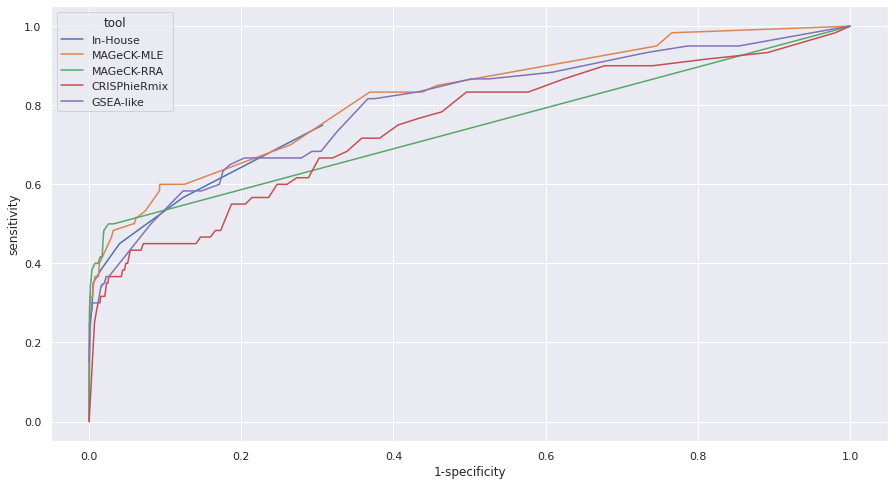

In [15]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.lineplot(data=all_tools, x = "1-specificity", y = "sensitivity", hue="tool")